### Part 2

#### Import Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Set path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 4/01-2025 Instacart Basket Analysis'

In [34]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [36]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of dependents,Family status,Income
0,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,...,Frequent customer,Thomas,Johnson,Male,Colorado,58,9/9/2019,0,single,31381
1,2754998,68576,6,0,8,7.0,25773,16,1,#2 Coffee Filters,...,Frequent customer,Kevin,Ramsey,Male,Oregon,60,3/6/2019,1,married,100174
2,3086607,168921,27,2,20,0.0,25773,2,0,#2 Coffee Filters,...,Frequent customer,Eric,Hobbs,Male,District of Columbia,60,2/12/2020,2,married,155816
3,429310,88247,2,4,10,8.0,25773,12,0,#2 Coffee Filters,...,Frequent customer,Harold,Douglas,Male,Kansas,45,1/3/2018,2,married,137340
4,1836950,15906,2,3,14,12.0,25773,7,0,#2 Coffee Filters,...,Regular customer,Andrew,Booker,Male,Utah,44,12/23/2019,0,single,123608


In [38]:
df.shape

(32404859, 33)

In [40]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_perdiod_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days_order', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of dependents', 'Family status', 'Income'],
      dtype='object')

In [46]:
df['prices'].max()

25.0

In [44]:
df.loc[df['prices'] >1000, 'prices'] = np.nan

In [48]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [50]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [52]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [54]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

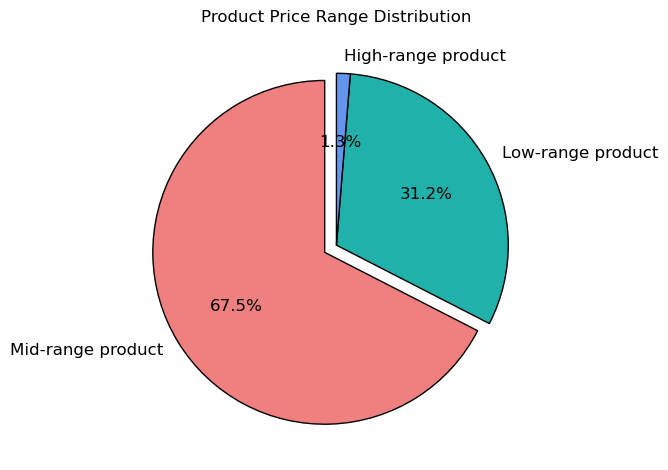

In [56]:
# Set up color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08 , 0, 0 ]

# Plot a pie
price_range_distribution_pie = df['price_range_loc'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Product Price Range Distribution')
plt.tight_layout()

#### Q3. Create a histogram of the “order_hour_of_day” column.

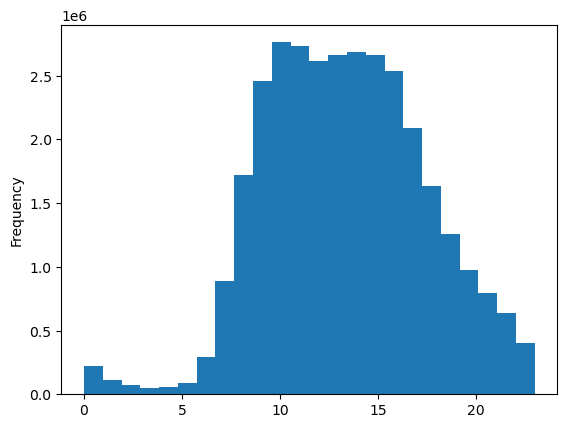

In [20]:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

##### Most orders take place between 8am - 4pm. peak orders take place arond 9-10 am.

#### Q4. Create a bar chart from the “loyalty_flag” column.

In [32]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

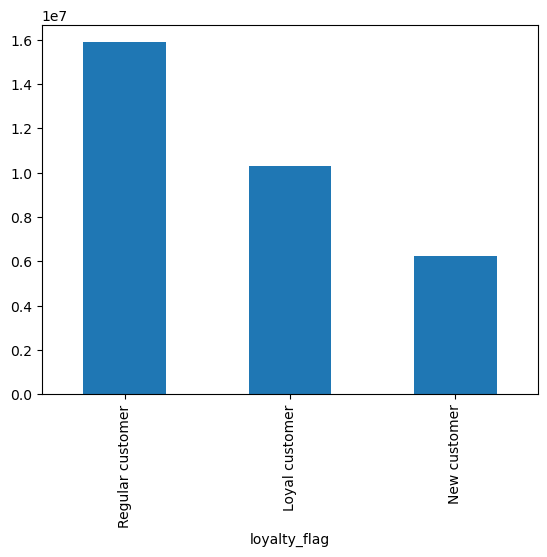

In [38]:
bar = df['loyalty_flag'].value_counts().plot.bar()

#### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [43]:
# Create a random sample by generating a seed
np.random.seed(4)

In [45]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(df)) <= 0.7

In [47]:
# Split the dataframe into two samples
big = df[dev]
small = df[~dev]

In [49]:
len(df)

32404859

In [51]:
len(big)

22683761

In [53]:
len(small)

9721098

In [55]:
len(big) + len(small)

32404859

In [57]:
df_2 = small[['order_hour_of_day','prices']]

In [59]:
df_2.head()

,order_hour_of_day,prices
0,0,11.0
2,20,11.0
3,10,11.0
6,11,11.0
10,14,11.0


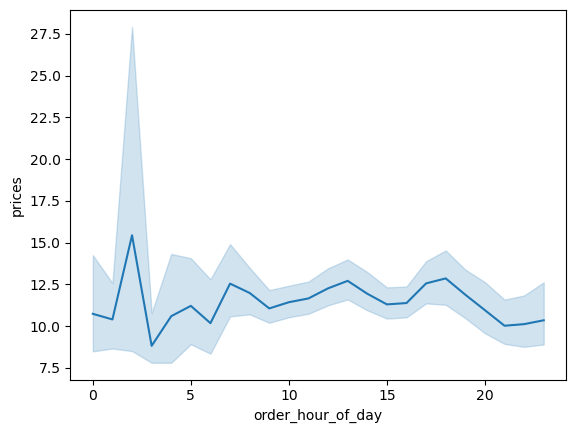

In [61]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#### Q6. connection between age and family situation

In [72]:
df_3 = small[['Age','Number of dependents']]

In [76]:
df_3.head()

,Age,Number of dependents
0,58,0
2,60,2
3,45,2
6,34,0
10,71,2


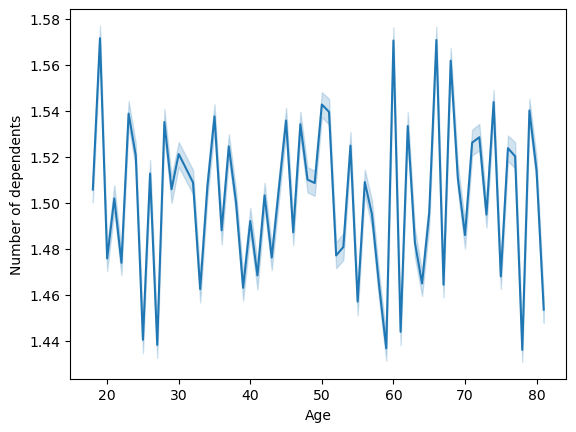

In [99]:
# Create a line chart
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'Number of dependents')

#### The chart demonstrates, there is no connection between age and family situation as the line does not consistantly deviate as the age increses

#### Q7. Explore whether there’s a connection between age and spending power (income)

In [82]:
df_4 = small[['Age', 'Income']]

In [84]:
df_4.head()

,Age,Income
0,58,31381
2,60,155816
3,45,137340
6,34,46652
10,71,165607


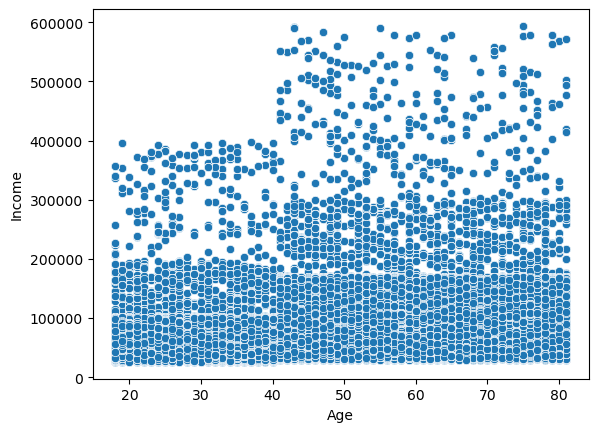

In [88]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'Age', y = 'Income',data = df_4)

#### Although most income for all age goups are densly concentrated withn the lower income range, there is significant increase in income for users with age 40 and up. This signifies there is positive correlation between age and income. 

### Export your visualizations as “.png” files in your relevant project folder.

In [93]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'order_hour_of_day_frequency_histogram.png'))

In [95]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_falg_dist_bar.png'))

In [97]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Hour_of_day_prices_line.png'))

In [103]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_number_dependents_line.png'))

In [101]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_Income_line.png'))